In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/totalwithmaininfo.csv',sep=',')

In [ ]:
df.head()

,Participant,Y,MOE,EAR,MAR,Circularity,EAR_N,MAR_N,Circularity_N,MOE_N
9732,21,0,3.183684,0.277743,0.884245,0.403793,0.027195,3.714902,-0.442054,0.634260
439,1,0,3.548000,0.269466,0.956065,0.422703,0.483004,-1.553248,1.079168,-0.791285
8682,19,10,2.969215,0.321463,0.954494,0.446549,0.472196,-0.013333,-0.560756,-0.402122
10406,22,10,2.268116,0.350611,0.795226,0.520463,1.692324,-0.115952,3.129688,-2.349882
890,2,10,5.196763,0.202040,1.049952,0.391874,-3.678171,0.314573,-2.921749,5.171706


In [ ]:
df.shape

(10560, 10)

In [ ]:
df=df.drop(df.columns[0], axis=1)
df.loc[df.Y == 0.0, "Y"] = int(0)
df.loc[df.Y == 10.0, "Y"] = int(1)

In [ ]:
df.head()

,Y,MOE,EAR,MAR,Circularity,EAR_N,MAR_N,Circularity_N,MOE_N
9732,0,3.183684,0.277743,0.884245,0.403793,0.027195,3.714902,-0.442054,0.634260
439,0,3.548000,0.269466,0.956065,0.422703,0.483004,-1.553248,1.079168,-0.791285
8682,1,2.969215,0.321463,0.954494,0.446549,0.472196,-0.013333,-0.560756,-0.402122
10406,1,2.268116,0.350611,0.795226,0.520463,1.692324,-0.115952,3.129688,-2.349882
890,1,5.196763,0.202040,1.049952,0.391874,-3.678171,0.314573,-2.921749,5.171706


In [ ]:
train_percentage = 17/22
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [ ]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [ ]:
x_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [ ]:

x_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [ ]:
x_test.shape

(2400, 8)

In [ ]:
x_train.shape

(8160, 8)

In [ ]:
import numpy as np
x_shaped_train  = np.array(x_train).reshape(1632,5,8)
x_shaped_test  = np.array(x_test).reshape(480,5,8)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

y_shaped_train  = []
for i in range(0, len(y_train), 5):
  y_shaped_train.append([y_train[i]])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), 5):
  y_shaped_test.append([y_test[i]])
print(len(y_shaped_test))

1632
480


In [ ]:
x_shaped_train.shape

(1632, 5, 8)

In [ ]:
x_shaped_test.shape

(480, 5, 8)

In [ ]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(1632, 1)

In [ ]:

y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(480, 1)

In [ ]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

In [ ]:
metrics = ['accuracy']
model = Sequential()
model.add(Dense(1024, activation='sigmoid'))
model.add(LSTM(512, return_sequences=True, input_shape=(5, 4,),dropout=0.5))
model.add(Flatten())
model.add(Dense(216, activation='relu')) #FC1
model.add(Dense(32, activation='relu')) #FC2
model.add(Dropout(0.5))
model.add(Dense(16, activation='tanh'))#FC3
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))#Output Layer
optimizer = Adam(lr=0.00005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(x_shaped_train, y_shaped_train, epochs=50, batch_size=  10, validation_split=0.2)
model.predict_classes(x_shaped_test)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


131/131 [==============================] - 16s 65ms/step - loss: 2.2550 - accuracy: 0.5139 - val_loss: 0.7277 - val_accuracy: 0.5107
Epoch 2/50
131/131 [==============================] - 7s 54ms/step - loss: 1.7257 - accuracy: 0.4861 - val_loss: 0.7538 - val_accuracy: 0.5107
Epoch 3/50
131/131 [==============================] - 7s 52ms/step - loss: 2.1941 - accuracy: 0.4843 - val_loss: 0.8159 - val_accuracy: 0.5107
Epoch 4/50
131/131 [==============================] - 6s 50ms/step - loss: 2.4116 - accuracy: 0.5244 - val_loss: 0.9828 - val_accuracy: 0.5107
Epoch 5/50
131/131 [==============================] - 7s 50ms/step - loss: 1.5869 - accuracy: 0.5107 - val_loss: 0.8970 - val_accuracy: 0.5107
Epoch 6/50
131/131 [==============================] - 7s 50ms/step - loss: 2.2767 - accuracy: 0.5281 - val_loss: 0.9031 - val_accuracy: 0.5107
Epoch 7/50
131/131 [==============================] - 7s 50ms/step - loss: 1.8376 - accuracy: 0.5096 - val_loss: 0.8381 - val_accuracy: 0.5107
Epoch 8/5

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
pred_rnn = model.predict_classes(x_shaped_test)
y_score_10 = model.predict_proba(x_shaped_test)
acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = metrics.f1_score(y_shaped_test, np.array(pred_rnn))
roc_10 = metrics.roc_auc_score(y_shaped_test, y_score_10)
print([acc10, f1_score_10, roc_10])
print(confusion_matrix(y_shaped_test, pred_rnn))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0.6333333333333333, 0.41721854304635764, 0.5951048951048952]
[[241  19]
 [157  63]]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


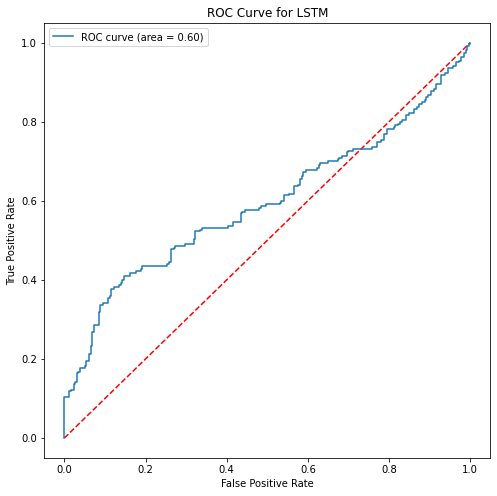

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_shaped_test, y_score_10)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_10)
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

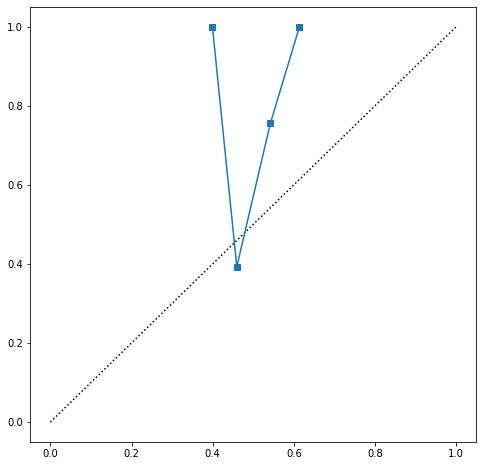

In [ ]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_shaped_test,y_score_10,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-", label="%s" % 'LSTM')